Logistic Regression

In [1132]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 

In [1133]:
def get_dataset(title):
    return pd.read_csv(title+'.csv')

In [1134]:
def set_input(range_x_1, range_x_2):
    return dataset.iloc[:, [range_x_1, range_x_2]].values

In [1135]:
def set_output(range_y):
    return dataset.iloc[:, range_y].values

In [1136]:
def classifier(x,y):
    return LogisticRegression(random_state = 0, solver='lbfgs').fit(x, y)

In [1137]:
def classifier_pred(classifier_modal,x):
     return classifier_modal.predict(x)   

In [1155]:
def conf_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print ("Accuracy : ", accuracy_score(y_test, y_pred), '\n----------------') 
    data = {'y_Actual':    y_test,
            'y_Predicted': y_pred}
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    cm = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Gercek'], colnames=['Tahmin'])
    #, margins = True
    sn.heatmap(cm, annot=True)
    plt.show()

In [1165]:
def plot_graph():
    X_set, y_set = x_test, y_test

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                    stop = X_set[:, 0].max() + 1, step = 0.01), 
                         np.arange(start = X_set[:, 1].min() - 1, 
                                    stop = X_set[:, 1].max() + 1, step = 0.01)) 


    plt.contourf(X1, X2, classifier_pred(classifier_modal, 
        np.array([X1.ravel(), X2.ravel()]).T).reshape( 
        X1.shape), alpha = 0.75, cmap = 'bone') 

    plt.xlim(X1.min(), X1.max()) 
    plt.ylim(X2.min(), X2.max()) 

    for i, j in enumerate(np.unique(y_set)): 
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
        c = ListedColormap(('yellow', 'black'))(i), label = j) 

    plt.title('Logistic Regression') 
    plt.xlabel('X') 
    plt.ylabel('Y') 
    plt.legend() 
    plt.show()

In [1157]:
#Set Dataset
dataset = get_dataset(title = 'User_Data')

In [1158]:
#Set x & y 
x = set_input(range_x_1 = 2, range_x_2 = 3)
y = set_output(range_y = 4) 

In [1159]:
#Set all params
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [1160]:
# Ölçeklendirme
sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train.astype(np.float))
x_test = sc_x.transform(x_test.astype(np.float))


In [1161]:
#Set the classifier modal
classifier_modal = classifier(x_train, y_train)

In [1162]:
#Set the y predict
y_pred = classifier_pred(classifier_modal, x_test)

Accuracy :  0.89 
----------------


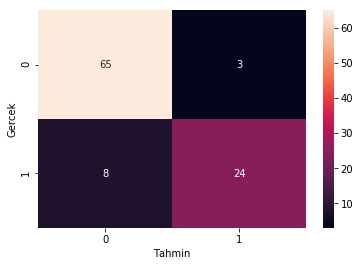

In [1163]:
#Set Confussion Matrix
conf_mat(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


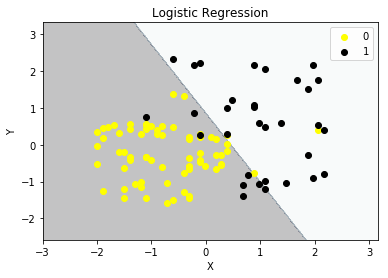

In [1164]:
plot_graph()